# Intent Classification - Chatbot - DL

In [192]:
from nltk import word_tokenize
import pandas as pd 
import numpy as np
import spacy
import re
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split

In [193]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Embedding, LSTM, Bidirectional, SpatialDropout1D
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Flatten, Conv1D, GlobalMaxPooling1D, MaxPooling1D, concatenate, Input


In [3]:
with open("ChatbotCorpus.json", 'r', encoding='utf-8') as f:
    data = json.load(f)
    intent_data = [[dat["text"], dat["intent"]] for dat in data["sentences"]]

In [4]:
intent_data

[['i want to go marienplatz', 'FindConnection'],
 ['when is the next train in muncher freiheit?', 'DepartureTime'],
 ['when does the next u-bahn leaves from garching forschungszentrum?',
  'DepartureTime'],
 ['from olympia einkaufszentrum to hauptbahnhof', 'FindConnection'],
 ['when is the next train from winterstraße 12 to kieferngarten',
  'FindConnection'],
 ['when is the next rocket from winterstraße 12 to kieferngarte',
  'FindConnection'],
 ['can you find a connection from garching to hauptbahnhof?',
  'FindConnection'],
 ['how to get from untere strassäcker 21 to fröttmaning', 'FindConnection'],
 ['how i can get from marienplatz to garching', 'FindConnection'],
 ['connection from boltzmannstraße to kieferngarten', 'FindConnection'],
 ['how to get from bonner platz to freimann?', 'FindConnection'],
 ['when is the next s-bahn leaving at garching?', 'DepartureTime'],
 ['how do i get from oez to hbf?', 'FindConnection'],
 ['how to get from winterstrasse 12 to fröttmaning', 'FindConn

In [5]:
df = DataFrame (intent_data,columns=['Chat','Intent'])
df

,Chat,Intent
0,i want to go marienplatz,FindConnection
1,when is the next train in muncher freiheit?,DepartureTime
2,when does the next u-bahn leaves from garching...,DepartureTime
3,from olympia einkaufszentrum to hauptbahnhof,FindConnection
4,when is the next train from winterstraße 12 to...,FindConnection
...,...,...
201,connection from hauptbahnhof to odeonsplatz?,FindConnection
202,how do i get from olympia einkaufszentrum to h...,FindConnection
203,when is the next bus in garching forschungszen...,DepartureTime
204,how can i get from garching to marienplatz,FindConnection


In [6]:
df.head(20)

,Chat,Intent
0,i want to go marienplatz,FindConnection
1,when is the next train in muncher freiheit?,DepartureTime
2,when does the next u-bahn leaves from garching...,DepartureTime
3,from olympia einkaufszentrum to hauptbahnhof,FindConnection
4,when is the next train from winterstraße 12 to...,FindConnection
5,when is the next rocket from winterstraße 12 t...,FindConnection
6,can you find a connection from garching to hau...,FindConnection
7,how to get from untere strassäcker 21 to frött...,FindConnection
8,how i can get from marienplatz to garching,FindConnection
9,connection from boltzmannstraße to kieferngarten,FindConnection


In [7]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    text = text.lower()
    return text

In [8]:
df['Chat'] = df['Chat'].apply(clean_text)

In [9]:
df.head()

,Chat,Intent
0,i want to go marienplatz,FindConnection
1,when is the next train in muncher freiheit,DepartureTime
2,when does the next ubahn leaves from garching ...,DepartureTime
3,from olympia einkaufszentrum to hauptbahnhof,FindConnection
4,when is the next train from winterstrae 12 to ...,FindConnection


In [10]:
df['Intent'].value_counts() 

FindConnection    128
DepartureTime      78
Name: Intent, dtype: int64

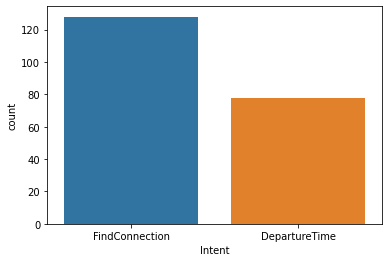

In [11]:
sns.countplot(df['Intent'],label="Count")
plt.show()

In [12]:
intents = df['Intent'].unique()
intents

array(['FindConnection', 'DepartureTime'], dtype=object)

In [13]:
MAX_NB_WORDS = 500
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Chat'].values)
word_index = tokenizer.word_index
NB_WORDS = len(word_index)+1
print('Found %s unique tokens.' % NB_WORDS)

Found 174 unique tokens.


In [14]:

X = tokenizer.texts_to_sequences(df['Chat'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', X.shape)

Shape of data tensor: (206, 100)


In [15]:
Y = pd.get_dummies(df['Intent']).values

print('Shape of label tensor:', Y.shape)


Shape of label tensor: (206, 2)


In [22]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True, test_size = 0.2)

In [24]:
def plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot( acc, 'b', label='Train')
    plt.plot( val_acc, 'r', label='Test')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot( loss, 'b', label='Train')
    plt.plot(val_loss, 'r', label='Test')
    plt.title('Loss')
    plt.legend()


In [25]:
def pred(model,text,classes):
    text = clean_text(text)
    tokenizer = Tokenizer(num_words=NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
    tokenizer.fit_on_texts([word_tokenize(text)])
    word_index = tokenizer.word_index
    # Sequence and padding
    P = tokenizer.texts_to_sequences([[text]])
    P = pad_sequences(P, maxlen=MAX_SEQUENCE_LENGTH)
    # print('Shape of tensor:', P.shape)
    # Class Prediction
    predict = model.predict(P)
    #x = np.argmax(predict, axis=-1)
    predict=predict[0]
    for i in range(len(predict)):
        print("%s  = %s" %(classes[i], (predict[i])))
    

# CNN Model

In [184]:
model = Sequential()
model.add(Embedding(NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1],trainable=False))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
#model.add(LSTM(100))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 17, 100)           17400     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 17, 32)            12832     
_________________________________________________________________
global_max_pooling1d_15 (Glo (None, 32)                0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 100)               3300      
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 202       
Total params: 33,734
Trainable params: 16,334
Non-trainable params: 17,400
____________________________________________

In [185]:
filename = 'CNN_model_2.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', save_best_only=True, mode='min')
history = model.fit(X_train, Y_train,
                    epochs=50,
                    validation_data=(X_test, Y_test),
                    batch_size=32, 
                    callbacks = [checkpoint])



Train on 164 samples, validate on 42 samples
Epoch 1/50
164/164 [==============================] - 1s 6ms/sample - loss: 2.0239 - accuracy: 0.6220 - val_loss: 1.8807 - val_accuracy: 0.5714
Epoch 2/50
164/164 [==============================] - 0s 334us/sample - loss: 1.8252 - accuracy: 0.6433 - val_loss: 1.7383 - val_accuracy: 0.5714
Epoch 3/50
164/164 [==============================] - 0s 322us/sample - loss: 1.6895 - accuracy: 0.6463 - val_loss: 1.6184 - val_accuracy: 0.5714
Epoch 4/50
164/164 [==============================] - 0s 334us/sample - loss: 1.5745 - accuracy: 0.6524 - val_loss: 1.5123 - val_accuracy: 0.5714
Epoch 5/50
164/164 [==============================] - 0s 389us/sample - loss: 1.4755 - accuracy: 0.6646 - val_loss: 1.4098 - val_accuracy: 0.6905
Epoch 6/50
164/164 [==============================] - 0s 298us/sample - loss: 1.3820 - accuracy: 0.7409 - val_loss: 1.3185 - val_accuracy: 0.7024
Epoch 7/50
164/164 [==============================] - 0s 365us/sample - loss: 1.2

In [186]:
model = load_model("CNN_model.h5")
acc = model.evaluate(X_test,Y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

42/42 [==============================] - 0s 3ms/sample - loss: 0.0998 - accuracy: 1.0000
Test set
  Loss: 0.100
  Accuracy: 1.000


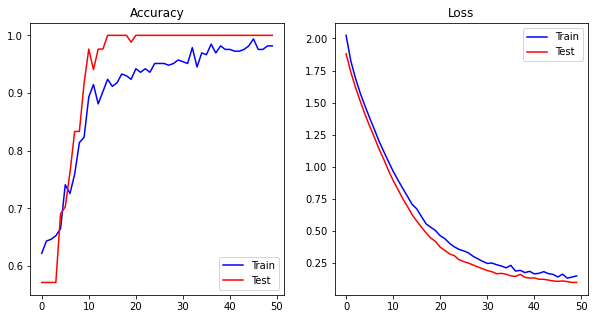

In [187]:
plot(history)

In [190]:
cnn_model = load_model("CNN_model.h5")


In [191]:
text = "When does the next bus leaves at garching forschungszentrum"
predictions = pred(cnn_model,text,intents)


FindConnection  = 0.3234832
DepartureTime  = 0.67009175


# LSTM Model

In [44]:
#LSTM

model = Sequential()
model.add(Embedding(NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Dense(2, activation='softmax'))
#adam = optimizers.Adam(lr=0.00008, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 17, 100)           17400     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 17, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 102       
Total params: 102,952
Trainable params: 102,952
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
epochs = 50
batch_size = 32
filename = 'LSTM_model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', save_best_only=True, mode='min')
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data = (X_test, Y_test), callbacks = [checkpoint])

Train on 164 samples, validate on 42 samples
Epoch 1/50
164/164 [==============================] - 4s 25ms/sample - loss: 0.6920 - accuracy: 0.5152 - val_loss: 0.6892 - val_accuracy: 0.5714
Epoch 2/50
164/164 [==============================] - 0s 1ms/sample - loss: 0.6842 - accuracy: 0.5732 - val_loss: 0.6851 - val_accuracy: 0.5714
Epoch 3/50
164/164 [==============================] - 0s 1ms/sample - loss: 0.6734 - accuracy: 0.6006 - val_loss: 0.6812 - val_accuracy: 0.5714
Epoch 4/50
164/164 [==============================] - 0s 1ms/sample - loss: 0.6654 - accuracy: 0.6128 - val_loss: 0.6783 - val_accuracy: 0.5714
Epoch 5/50
164/164 [==============================] - 0s 1ms/sample - loss: 0.6646 - accuracy: 0.6067 - val_loss: 0.6709 - val_accuracy: 0.5714
Epoch 6/50
164/164 [==============================] - 0s 1ms/sample - loss: 0.6577 - accuracy: 0.6098 - val_loss: 0.6638 - val_accuracy: 0.5714
Epoch 7/50
164/164 [==============================] - 0s 1ms/sample - loss: 0.6464 - accur

In [62]:
model = load_model("LSTM_model.h5")
acc = model.evaluate(X_test,Y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

42/42 [==============================] - 0s 11ms/sample - loss: 0.0192 - accuracy: 1.0000
Test set
  Loss: 0.019
  Accuracy: 1.000


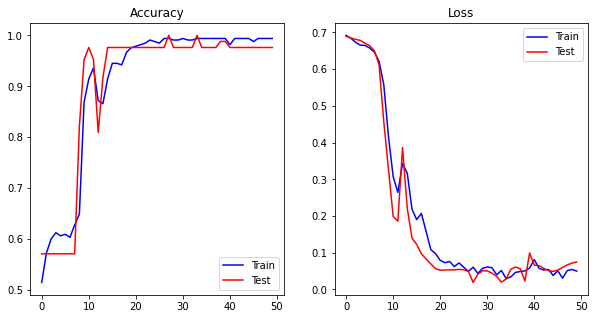

In [63]:
plot(history)

In [64]:
lstm_model = load_model("LSTM_model.h5")


In [65]:
text = "how i can get from marienplatz to garching"

predictions = pred(lstm_model,text,intents)

FindConnection  = 0.9984567
DepartureTime  = 0.00034624204
